<a href="https://colab.research.google.com/github/SKAZEXE/Zaidi/blob/main/Canada_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [72]:
df = pd.read_csv('//canada_per_capita_income.csv')
print(df.head())

   year  per capita income (US$)
0  1970              3399.299037
1  1971              3768.297935
2  1972              4251.175484
3  1973              4804.463248
4  1974              5576.514583


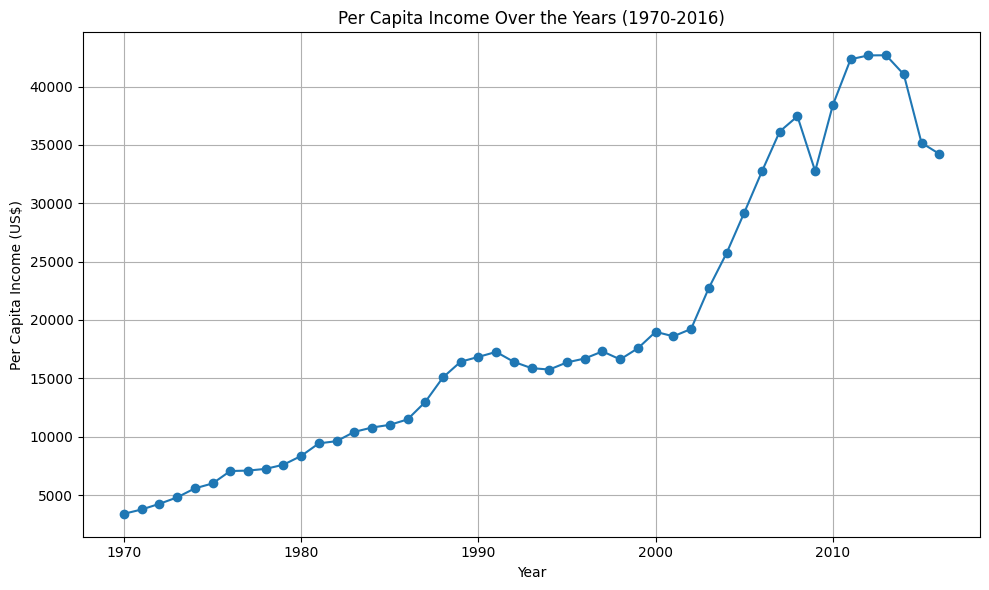

In [73]:
plt.figure(figsize=(10, 6))
plt.plot(df['year'], df['per capita income (US$)'], marker='o', linestyle='-')
plt.title('Per Capita Income Over the Years (1970-2016)')
plt.xlabel('Year')
plt.ylabel('Per Capita Income (US$)')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

In [74]:
reg = LinearRegression()

# Fit the model
reg.fit(df[['year']], df['per capita income (US$)'])
print("Coefficient:", reg.coef_[0])
print("Intercept:", reg.intercept_)



Coefficient: 828.4650752227104
Intercept: -1632210.7578554575


In [75]:
# Predict the per capita income for the year 2022
income_2022 = reg.predict([[2022]])

print(f'Predicted per capita income for 2022: ${income_2022[0]:.2f}')

Predicted per capita income for 2022: $42945.62


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [76]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Make predictions on the training data
predictions = reg.predict(df[['year']])

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(df['per capita income (US$)'], predictions)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(df['per capita income (US$)'], predictions)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)


Mean Absolute Error (MAE): 3088.866427771443
Mean Squared Error (MSE): 15462739.061504772


In [77]:
# Generate a DataFrame with years from 2015 to 2030
years_to_predict = list(range(2017, 2031))
predictions = reg.predict(np.array(years_to_predict).reshape(-1, 1))

# Create a new DataFrame to store the predictions
predicted_df = pd.DataFrame({'Year': years_to_predict, 'Predicted Per Capita Income (US$)': predictions})

# Print the predictions
print(predicted_df)


    Year  Predicted Per Capita Income (US$)
0   2017                       38803.298869
1   2018                       39631.763944
2   2019                       40460.229019
3   2020                       41288.694094
4   2021                       42117.159170
5   2022                       42945.624245
6   2023                       43774.089320
7   2024                       44602.554395
8   2025                       45431.019471
9   2026                       46259.484546
10  2027                       47087.949621
11  2028                       47916.414696
12  2029                       48744.879771
13  2030                       49573.344847


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [78]:
import pickle
with open('model.pkl', 'wb') as f:
  pickle.dump(reg, f)

In [79]:
with open('model.pkl', 'rb') as f:
  model = pickle.load(f)

In [80]:
model.predict([[2036]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([54544.13529798])

In [81]:
import pandas as pd
import numpy as np

# Generate dummy data
data = {
    'Area (sq. ft.)': [1500, 2000, 1800, 2200, 1600, 2100],
    'Bedrooms': [3, 4, 3, np.nan, 2, 4],
    'Age (years)': [10, 5, 8, 12, 6, 3],
    'Price ($)': [250000, 320000, 280000, np.nan, 210000, 350000]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Save to CSV file
df.to_csv('home_data.csv', index=False)

# Display the DataFrame
print(df)


   Area (sq. ft.)  Bedrooms  Age (years)  Price ($)
0            1500       3.0           10   250000.0
1            2000       4.0            5   320000.0
2            1800       3.0            8   280000.0
3            2200       NaN           12        NaN
4            1600       2.0            6   210000.0
5            2100       4.0            3   350000.0


# New section

In [82]:
df.to_csv('home_data.csv', index=False)
df.head()

,Area (sq. ft.),Bedrooms,Age (years),Price ($)
0,1500,3.0,10,250000.0
1,2000,4.0,5,320000.0
2,1800,3.0,8,280000.0
3,2200,NaN,12,NaN
4,1600,2.0,6,210000.0


In [83]:
import math

# Calculate the median of the "Bedrooms" column
median_bedrooms = math.floor(df['Bedrooms'].median())
print("Median Bedrooms:", median_bedrooms)

# Calculate the median of the "Price ($)" column
median_price = math.floor(df['Price ($)'].median())
print("Median Price:", median_price)


Median Bedrooms: 3
Median Price: 280000


In [84]:
df['Bedrooms'].fillna(median_bedrooms, inplace=True)

df['Price ($)'].fillna(median_price, inplace=True)
print(df)


   Area (sq. ft.)  Bedrooms  Age (years)  Price ($)
0            1500       3.0           10   250000.0
1            2000       4.0            5   320000.0
2            1800       3.0            8   280000.0
3            2200       3.0           12   280000.0
4            1600       2.0            6   210000.0
5            2100       4.0            3   350000.0


In [85]:
reg = LinearRegression()
reg.fit(df[['Area (sq. ft.)', 'Bedrooms', 'Age (years)']], df['Price ($)'])
reg.coef_

array([   51.3228663 , 47870.37540066, -1911.77269517])

In [86]:
reg.intercept_

48294.127234165586

In [87]:
reg.predict([[1500, 3, 10]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([249771.82593578])

In [88]:
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(reg, f)


In [89]:
with open('model.pkl', 'rb') as f:
    model = pickle.load(f)


In [90]:
model.predict([[1500, 3, 10]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([249771.82593578])

In [93]:
import pandas as pd

# Sample data with city names
data = {
    'city': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix'],
    'area (sq. ft.)': [1200, 1500, 1800, 2000, 1600],
    'prices ($)': [250000, 320000, 280000, 350000, 210000]
}

# Repeat each town 3 times
data['city'] *= 3
data['area (sq. ft.)'] *= 3
data['prices ($)'] *= 3

# Create a DataFrame
df = pd.DataFrame(data)

# Display the first few rows of the DataFrame
print("First few rows of the dataset:")
print(df.head())

# Save the DataFrame to a CSV file
df.to_csv('city_prices_repeated.csv', index=False)

print("Dataset saved to 'city_prices_repeated.csv'")


First few rows of the dataset:
          city  area (sq. ft.)  prices ($)
0     New York            1200      250000
1  Los Angeles            1500      320000
2      Chicago            1800      280000
3      Houston            2000      350000
4      Phoenix            1600      210000
Dataset saved to 'city_prices_repeated.csv'
